### Iris-Dataset

  - Regressão linear

In [1]:
import os, sys
import pandas as pd # pandas e seu alias pd
import numpy as np  # numpy  e seu alias np

from   scipy import stats
#-- for ANOVA
import statsmodels.api as sm
from   statsmodels.formula.api import ols

sys.path.insert(1, '../libs/')
from stat_lib import *

import seaborn as sns

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### Abrir Iris dataset

In [2]:
os.listdir("../data/")

['altitude.txt',
 'auto-mpg.data',
 'stm.txt',
 'velocities.txt',
 'stars.txt',
 'mycars.tsv',
 'circular.txt',
 'TB_data_dictionary_2020-09-11.csv',
 'osteocytes_exp02.xlsx',
 'Iris.csv',
 'TB_outcomes_2020-09-11.csv',
 'auto-mpg.names',
 'PBMC_NTC Stim 5hr no Blocker_004.fcs',
 'osteocytes_lfc.tsv',
 '701bc260-f9ac-11ea-835b-2581c48bf88a.pdf',
 'database.sqlite',
 'auto-mpg.tsv',
 'exemplo_estranho.txt',
 'Snake Morphotaxonomy.xlsx',
 'exemplo.html',
 'sunspots.txt',
 'COVID clinical trials.csv']

In [4]:
fname = "../data/Iris.csv"
if os.path.exists(fname):
    df = pd.read_csv(fname)
    print(df.shape, fname)
else:
    print("Impossivel abrir '%s'"%(fname))

(150, 6) ../data/Iris.csv


### Tabela da Iris de Ronald Fisher & Edgar Anderson (1936)

https://en.wikipedia.org/wiki/Iris_flower_data_set

### Partes da flor

![sepal and petal](../figure/flower-parts.jpg)

https://www.britannica.com/science/sepal

![sepal and petal](../figure/iris.png)

![sepal and petal](../figure/iris_len_width.jpeg)

In [5]:
print(df.shape)
df.head(3)

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [6]:
df.columns = ['id', 'sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'species']
df.tail(3)

,id,sepal_len,sepal_width,petal_len,petal_width,species
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.columns

Index(['id', 'sepal_len', 'sepal_width', 'petal_len', 'petal_width',
       'species'],
      dtype='object')

In [9]:
name = 'Iris-setosa'
df_seto = df[df.species == name]
df_seto.shape

(50, 6)

### Exercício: mostre por groupby que há 50 amostras por espécie

   df.groupby .... variavel .. count()

### Matriz de correlação - dim = num variáveis ** 2

In [10]:
df_seto[ ['sepal_len', 'sepal_width', 'petal_len', 'petal_width'] ].corr()

,sepal_len,sepal_width,petal_len,petal_width
sepal_len,1.000000,0.746780,0.263874,0.279092
sepal_width,0.746780,1.000000,0.176695,0.279973
petal_len,0.263874,0.176695,1.000000,0.306308
petal_width,0.279092,0.279973,0.306308,1.000000


### corr(x, y) == corr(y, x)

### Histograma e Scatter plot entre sépala e pétalas de Iris (orquídea)

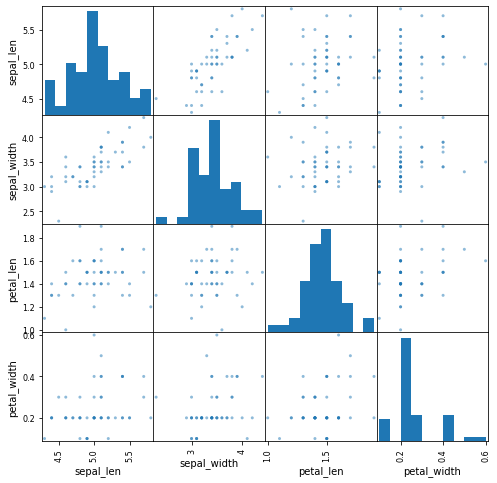

In [11]:
ret = pd.plotting.scatter_matrix(df_seto[ ['sepal_len', 'sepal_width', 'petal_len', 'petal_width'] ], figsize=(8, 8))
# plt.title('%s pair correlations'%(name));

In [ ]:
ret

### Matriz de correlação na forma de Heatmap

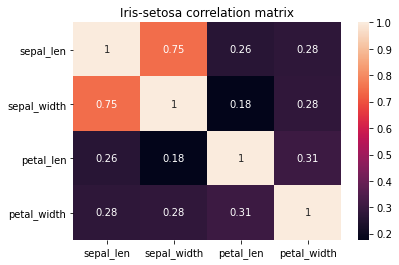

In [12]:
corr_mat = df_seto[ ['sepal_len', 'sepal_width', 'petal_len', 'petal_width'] ].corr()
sns.heatmap(corr_mat, annot = True)
plt.title('%s correlation matrix'%(name));

### Exercício: fazer a matriz de correlação das outras 2 espécies

### As medidas (comprimento (len) and largura (width)) devem se aproximar de uma distribuição normal
  - mostre que esta afirmação é verdadeira

In [13]:
ret, text, text_stat, stat, pvalue = test_normality_desc(df_seto.sepal_len)
text, text_stat

('A distribuição se assemelha a uma distriuição normal (não se rejeita a H0)',
 'p-value 4.60e-01 (NS)')

In [14]:
ret, text, text_stat, stat, pvalue = test_normality_desc(df_seto.sepal_width)
text, text_stat

('A distribuição se assemelha a uma distriuição normal (não se rejeita a H0)',
 'p-value 2.05e-01 (NS)')

In [15]:
ret, text, text_stat, stat, pvalue = test_normality_desc(df_seto.petal_len)
text, text_stat

('A distribuição se assemelha a uma distriuição normal (não se rejeita a H0)',
 'p-value 5.46e-02 (NS)')

In [16]:
ret, text, text_stat, stat, pvalue = test_normality_desc(df_seto.petal_width)
text, text_stat

('A distribuição não se assemelha a uma distriuição normal (rejeita-se a H0)',
 'p-value 1.85e-06 (***)')

### Como as distribuições são normais
### Teste de Hipótese (t-test) entre comparimentos de pétalas/sépalas entre espécies

### Vamos calcular correlação de Pearson entre sepal_len x sepal_width
  - a correlação de Pearson é somente entre 2 seguem a distribuição normal (contínua)
  - não vamos ver aqui, mas há a correlação de Speerman quando uma ou as duas variávies não segue uma distribuição normal mas podem ser ordenadas

referências:
  - https://www.statsmodels.org/stable/regression.html
  - https://realpython.com/numpy-scipy-pandas-correlation-python/
  - https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
  - https://benalexkeen.com/correlation-in-python/
  

### O que é regressão linear:
  - uma regressão linear é calculada através de duas variáveis
    - x = variável independente
    - y = variável dependente
      - dependente: se correlação for boa ou ótima
      - independente: se correlação não existir, for fraca
    
### A correlação mede o quanto uma variável dependente (y) depende (se correlaciona) com uma variável independete (x)    
    
  - se y depende 100% de x, então a correlação = 1 
    - exemplo y = 3 * x
  - se y depende 100% de x, mas inversamente, então a correlação = -1
    - ou seja, quando x cresce y decresce ou vice-versa
    - exemplo y = -3 * x
  - se y não depende de x, então a correlação fica próximo a 0
    - se duas variáveis são independentes (temperatura, T, da atmosfera e altura das crianças numa escola, h) então dizemos que não há correlação entre T e h
    - -0.2 < corr < 0.2 - correlação muito fraca - pode ter sindo encontrada 'ao acaso'
  - logo a correlação varia de -1 a +1, passando pelo zero.
    
### Faixa de correlação
  - Na prática 'se diz' que
    - [.8 a 1] = ótima correlação (pode ser negativo, também)
    - [.6 a .8[ = correlação boa
    - [.4 a .6[ = correlação regular
    - [.2 a .4[ = correlação ruim
    - [0 a .2[ = correlação muito ruim, sem correlação
    
### Importante! Na Biologia a maioria dos fenômenos são NÃO LINEARES
  - devido: complexidade
  - devido: fenômenos emergentes
    - quando a soma de todos os efetios << que o fenômeno final observado == EMERGÊNCIA
    
  Y = x * z * t**2 * sqrt(k) + 5

### Abaixo, o scattrer plot entre largura e comprimento das sépalas da Iris Setosa

  - não vemos ainda a regressão linear que pode ser calcula   
  - a regressão linear é uma reta que passa entre os pontos minimizando o erro
  - erro = desvio entre o valor Y e seu respectivo ponto na reta f(x), onde f(x) = y, reta predita


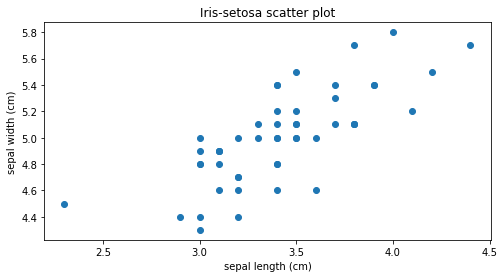

In [17]:
plt.figure(figsize=(8,4))
plt.scatter(df_seto.sepal_width, df_seto.sepal_len)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('%s scatter plot'%(name));

### A correlação de Pearson só pode ser calculada se os valores forem oriundos de distribuições normais

In [19]:
from scipy.stats import pearsonr

cor, pval = pearsonr(df_seto.sepal_width, df_seto.sepal_len)
'correlação = %.3f and p-value = %.2e'%(cor, pval)

'correlação = 0.747 and p-value = 4.75e-10'

### O p-value é retirado da estatística F de variância within e between

In [22]:
#-- ols = ordinary least square
#              largura ~ (depende) de comprimento
model = ols('sepal_width ~ sepal_len', data=df_seto)
fit = model.fit()
aov_table = sm.stats.anova_lm(fit, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
sepal_len,3.967231,1.0,60.518947,4.751987e-10
Residual,3.146569,48.0,NaN,NaN


In [ ]:
# fit.summary()

In [21]:
fit.pvalues

Intercept    2.373925e-01
sepal_len    4.751987e-10
dtype: float64

### Regressão Linear

  - uma reta pode ser descrita da forma:

y =  intercept + a * x  
(lembre-se y = ax+b)

  - ou mais generalizadamente
  
$y = b_0 + b_1 * x$

onde b0 = intercept = coeficiente linear  
e    b1 = a         = coeficiente angular
  

### O fitting calcula os parâmetro 'intercept' e 'a'

In [23]:
intercept, a = fit.params
intercept, a

(-0.6230117276042182, 0.8072336651226961)

### Agora podemos plotar a regressão
  - como já afirmamos, acima: uma regressão linear é um cáculo matemático para se calcular uma reta que passa por entre todos valores (x,y) apresentados, minizando o erro total (distância da reta até cada valor y), ora denominado de resíduo

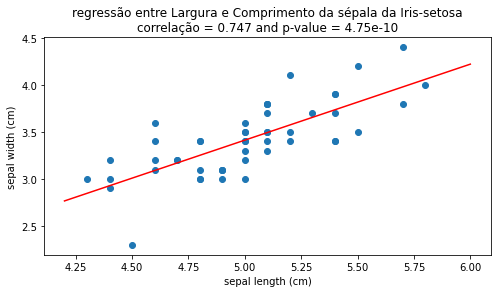

In [37]:
xseq = np.linspace(4.2, 6, 22)
# fitting --> reta predita y = ax + b = ax + intercepto
yseq = intercept + a * xseq

cor, pval = pearsonr(df_seto.sepal_width, df_seto.sepal_len)
stri = 'correlação = %.3f and p-value = %.2e'%(cor, pval)

# reta vermelha --> yhat - preditor que minimiza erros
# erros : desvio de um ponto qq (y) de seu valor em yhat
# erro: diferença entre valor real - valor estimado (predito)
plt.figure(figsize=(8,4))
plt.scatter(df_seto.sepal_len, df_seto.sepal_width)
plt.plot(xseq, yseq, color='red')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('regressão entre Largura e Comprimento da sépala da %s\n%s'%(name, stri));

### Resíduos

### É a diferença entre cada valor de Y (valores observados) pelo Yhat (valores preditos)

![residuals](../figure/residuals.png)

### Gráfico de resíduos

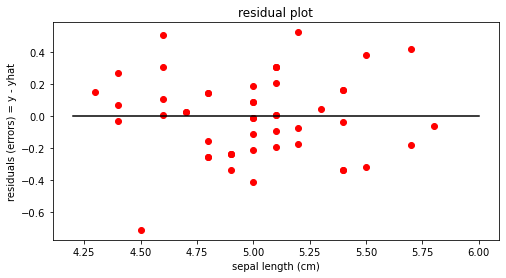

In [30]:
plt.figure(figsize=(8,4))

plt.scatter(df_seto.sepal_len, fit.resid, color='red')
plt.plot(xseq, [0]*len(xseq), color='black')

plt.xlabel('sepal length (cm)')
plt.ylabel('residuals (errors) = y - yhat')
plt.title('residual plot');

### Soma dos resíduos

In [31]:
np.sum(fit.resid)

6.750155989720952e-14

### O que boa regressão linear?
  - É aquela com cor > 0.6, pvalue muito baixo (<< 0.05)
  - soma dos resíduos tenda a zero
  - histograma dos resíduos seja uma distribuição Normal

### Distribuição dos resíduos

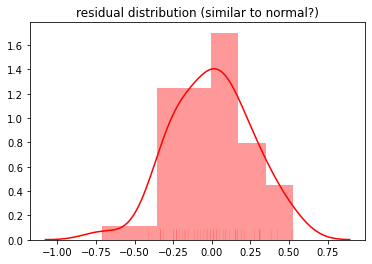

In [32]:
sns.distplot(fit.resid, kde=True, rug=True, norm_hist=True, color='red', rug_kws={"color": 'red', "alpha": .1,})
plt.title('residual distribution (similar to normal?)');

In [34]:
ret, text, text_stat, stat, pvalue = test_normality_desc(fit.resid)
text, text_stat

('A distribuição se assemelha a uma distriuição normal (não se rejeita a H0)',
 'p-value 8.30e-01 (NS)')

### Não pode haver correlação nos resíduos para uma perfeita regressão linear

In [39]:
cor, pval = pearsonr(fit.resid, df_seto.sepal_len)
'correlation = %.3f and p-value = %.2e'%(cor, pval)

'correlation = 0.000 and p-value = 1.00e+00'

### Exercício: simule valores para correlação cujo valor se aproxima de +1, -1, e 0 (zero)

#### Recomendação:
  - nas aulas anteriores aprendemos a gerar números randômicos

    a) se x = random.normal(2, 1) e y = 2 * x, então a correlação = +1  
    b) se x = random.normal(2, 1) e y = random.normal(3, .9), então a correlação é ??  
    c) se x = random.normal(2, 1) e y = -1 * x + random.normal(0, 1), então a correlação é ??  
    <br>
      - neste último caso random.normal(0, 1) é denominado de erro aleatório ou ruído branco

### Exemplo não linear

y = 2 * x**2 + 1

Text(0.5, 1.0, 'Equação de segundo grau')

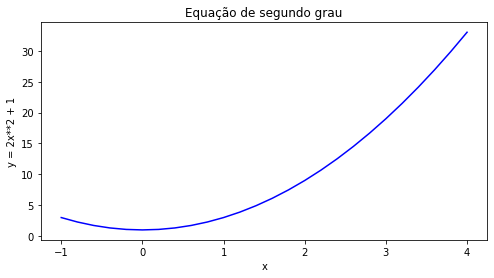

In [61]:
xseq = np.linspace(-1, 4, 26)
yseq = 2 * xseq**2 + 1

plt.figure(figsize=(8,4))
plt.plot(xseq, yseq, color='blue')
plt.xlabel('x')
plt.ylabel('y = 2x**2 + 1')
plt.title('Equação de segundo grau')

In [60]:
cor, pval = pearsonr(yseq, xseq)
'correlation = %.3f and p-value = %.2e'%(cor, pval)

'correlation = 0.000 and p-value = 1.00e+00'

In [51]:
df2 = pd.DataFrame([xseq, yseq]).T
df2.columns = ['x', 'y']
df2.head()

,x,y
0,-1.0,3.00
1,-0.8,2.28
2,-0.6,1.72
3,-0.4,1.32
4,-0.2,1.08


In [52]:
model = ols('y ~ x', data=df2)
fit = model.fit()
aov_table = sm.stats.anova_lm(fit, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
x,2106.000,1.0,120.535714,7.696706e-11
Residual,419.328,24.0,NaN,NaN


In [53]:
fit.pvalues

Intercept    3.969051e-01
x            7.696706e-11
dtype: float64

In [54]:
intercept, a = fit.params
intercept, a

(0.9999999999999987, 6.000000000000002)

### Predição 

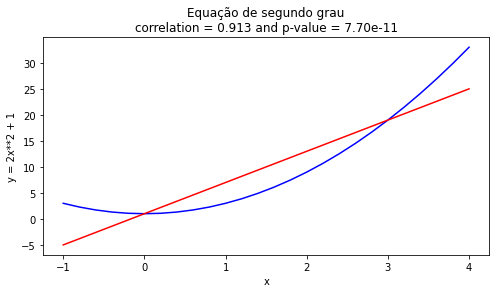

In [55]:
xseq = np.linspace(-1, 4, 26)
yseq = 2 * xseq**2 + 1
yhat = a*xseq + intercept

plt.figure(figsize=(8,4))
plt.plot(xseq, yseq, color='blue')
plt.plot(xseq, yhat, color='red')
plt.xlabel('x')
plt.ylabel('y = 2x**2 + 1')

stri = 'correlation = %.3f and p-value = %.2e'%(cor, pval)
plt.title('Equação de segundo grau\n%s'%(stri));

In [56]:
np.sum(fit.resid)

-2.1316282072803006e-14

### Gráfico de resíduos

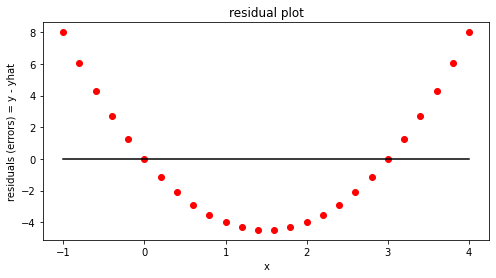

In [57]:
plt.figure(figsize=(8,4))

plt.scatter(df2.x, fit.resid, color='red')
plt.plot(xseq, [0]*len(xseq), color='black')

plt.xlabel('x')
plt.ylabel('residuals (errors) = y - yhat')
plt.title('residual plot');

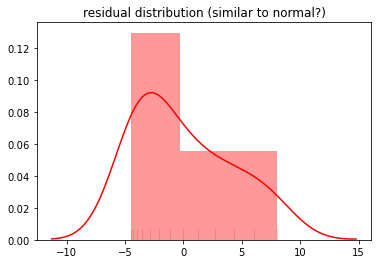

In [58]:
sns.distplot(fit.resid, kde=True, rug=True, norm_hist=True, color='red', rug_kws={"color": 'red', "alpha": .1,})
plt.title('residual distribution (similar to normal?)');